## Exploratory Data Analysis of the Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing the Dataset

In [2]:
#importing the dataset using pandas read_csv
titanic_df= pd.read_csv("./train.csv")
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Inspection

In [3]:
titanic_df.shape

(891, 13)

In [4]:
titanic_df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Relationship
titanic_df.corr()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Unnamed: 0,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
PassengerId,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


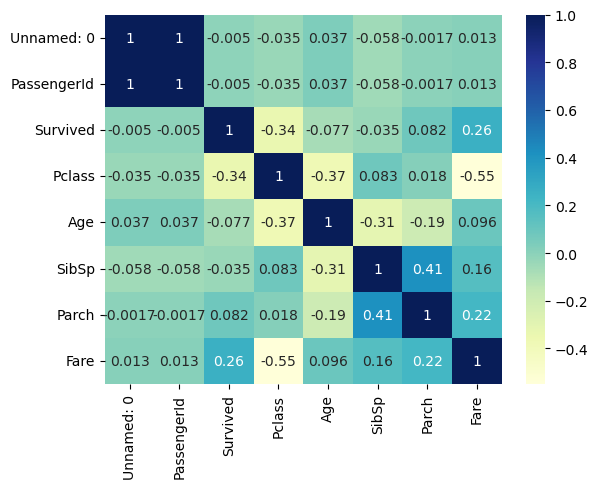

In [9]:
# plotting correlation heatmap
sns.heatmap(titanic_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [16]:
titanic_df.notnull().sum()

Unnamed: 0     891
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [18]:
# Check number of null values in a column
titanic_df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#dropping column not in use and having maximum number of null values i.e. Cabin column
titanic_df_cleaned = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_df_cleaned.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


## Dealing with missing values

In [20]:
age_average = np.round(titanic_df_cleaned.Age.mean(),2)
age_average

29.7

In [21]:
titanic_df_cleaned["Age"].fillna(age_average, inplace=True)

In [22]:
titanic_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Data Visualization

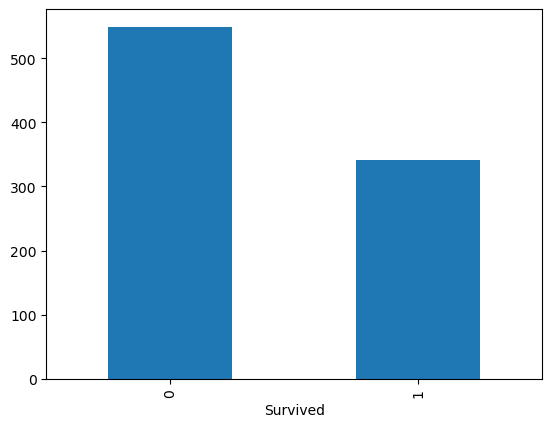

In [26]:
survivied = titanic_df_cleaned.groupby(["Survived"])["Survived"].count().plot(kind="bar")



In [27]:
titanic_df_cleaned.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [28]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
pclass_count = titanic_df_cleaned.groupby('Pclass')["Pclass"].count()

In [29]:
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [30]:
pclass_count.values

array([216, 184, 491], dtype=int64)

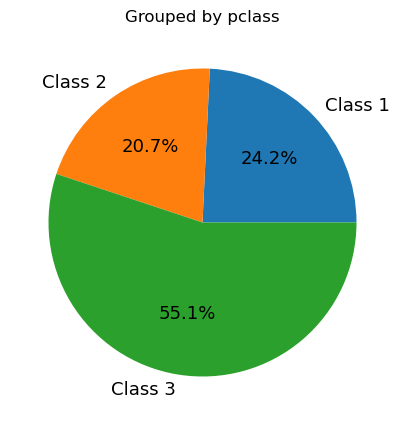

In [31]:
plt.figure(figsize=(7,5))

plt.title('Grouped by pclass')

plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})

plt.show()

For Port Embarked

In [35]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = titanic_df.groupby('Embarked')['Embarked'].count()
embark_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

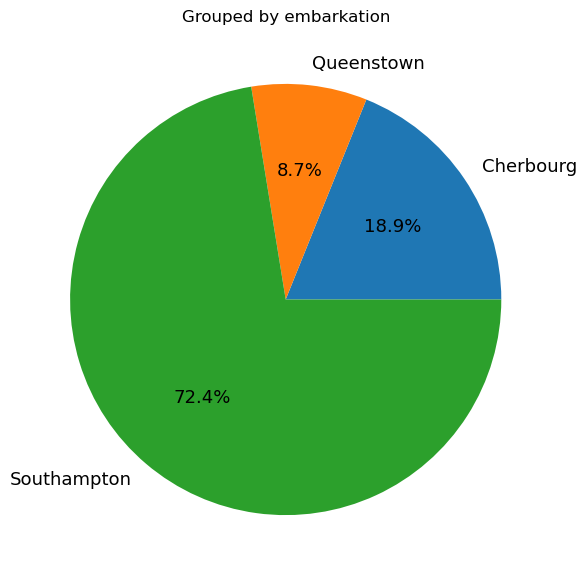

In [37]:
plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

## Analysis
Did Sex play a role in Survival?

Did class played role in survival?

1. Did Sex play a role in Survival?

In [39]:
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()
survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

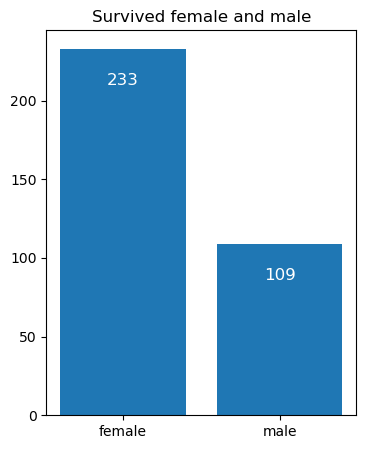

In [43]:
#Survivial number according to gender or sex i.e. Male and Female
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()

plt.figure(figsize=(4,5))

plt.bar(survived_sex.index, survived_sex.values)

plt.title('Survived female and male')

for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
    
plt.show()

2. Did class played role in survival?

In [44]:
#sns.plt.hist(df_cleaned.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = titanic_df_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

## Percentage of each survivor

In [45]:
titanic_df_cleaned.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [46]:
percent_by_class_survived = titanic_df_cleaned.groupby(['Pclass'])['Survived'].sum()/titanic_df_cleaned.groupby(['Pclass'])['Survived'].count()*100
percent_by_class_survived

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


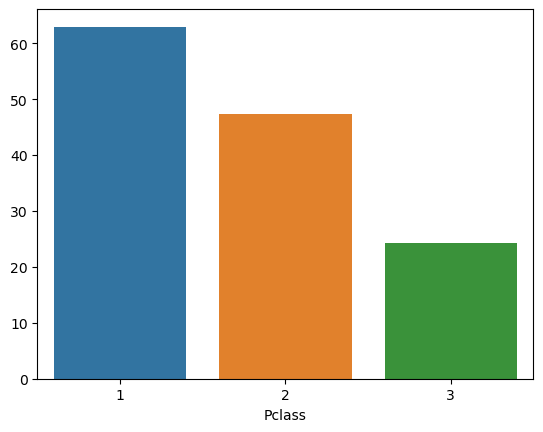

In [47]:
sns.barplot(percent_by_class_survived.index, percent_by_class_survived.values)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'seaborn' has no attribute 'plt'

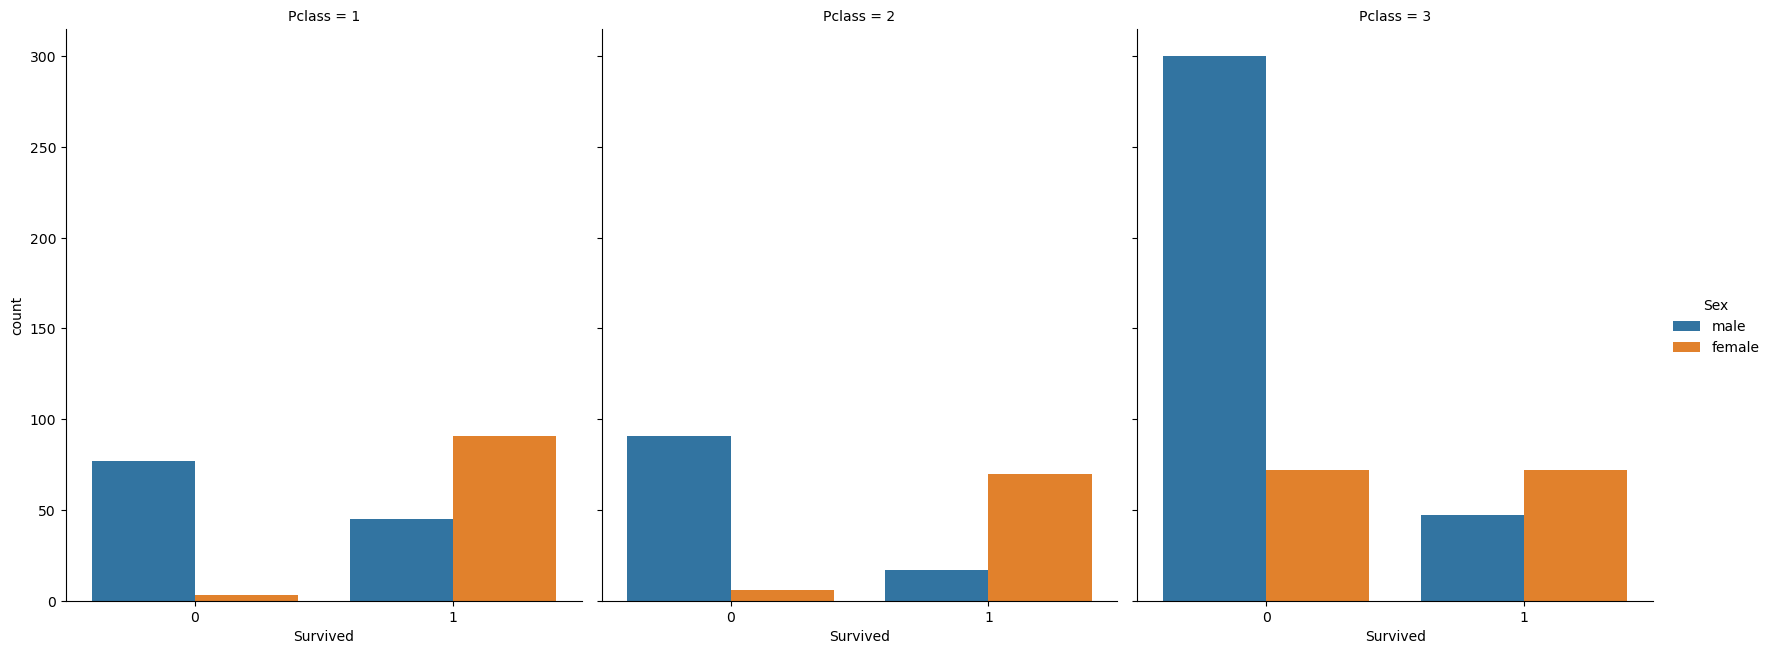

In [48]:
sns.factorplot('Survived', col='Pclass', hue='Sex', data=titanic_df_cleaned, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')

plt.show()

## Insight:
Hence, we can see that the change of survival did vary with different factors such as gender, embarkation and ticket class.

In gender, we see that women had higher chances of survival.

In the ticket visualization, we can see that people in Class 3 had a lower chance of survival and the people in class 1 had a higher chance of surviva